In [47]:
import sqlite3
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [48]:
# Connect to the SQLite database
db_path = r"C:\Users\SHREYAS M S\OneDrive\Pictures\vs code\Python\mapped_data.db"  # Replace with your database file path
conn = sqlite3.connect(db_path)

# Query to fetch data
query = "SELECT * from student_institution_mappings;"  # Replace 'students' with your table name

# Load data into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the first few rows of the DataFrame
print("Data from the SQLite table:")
print(df.head())  # Use print() instead of display() for standard Python environments



Data from the SQLite table:
   id      student_name   cgpa  project_score  internships  \
0   1            Monica  10.00           98.4            1   
1   2      Minni kumari   9.81           98.6            0   
2   3  Harshith C Gowda   9.26           97.4            1   
3   4       Aryan Arora   8.15           99.1            2   
4   5       Syed Arfaan   6.44           99.9            1   

   extracurricular_score  total_score        department   field   outcome  \
0                   98.9       337.20             Civil  Non-IT  Selected   
1                   98.5       334.94        Electrical  Non-IT  No Offer   
2                   99.7       333.04  Computer Science      IT  No Offer   
3                   93.3       327.10             Civil  Non-IT  Selected   
4                   98.5       325.56        Electrical  Non-IT  Selected   

                        institution_name  institution_rank  
0  Indian Institute of Technology Madras                 1  
1  Indian Inst

In [49]:
print(df[0:12])

    id             student_name   cgpa  project_score  internships  \
0    1                   Monica  10.00           98.4            1   
1    2             Minni kumari   9.81           98.6            0   
2    3         Harshith C Gowda   9.26           97.4            1   
3    4              Aryan Arora   8.15           99.1            2   
4    5              Syed Arfaan   6.44           99.9            1   
5    6          Chaithra G Bhat   7.30           97.6            3   
6    7            Nivedita Bhat   8.62           97.8            3   
7    8             DEEKSHITH BH   8.46           96.4            1   
8    9             Neha Annie S   8.02           96.5            3   
9   10                HARSH RAJ   8.55           99.7            3   
10  11               Anusha G K   9.53           99.5            1   
11  12  Luqmaan Mujahid Mohamed   8.64           95.4            2   

    extracurricular_score  total_score        department   field   outcome  \
0          

In [50]:
df.shape

(600, 12)

In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     600 non-null    int64  
 1   student_name           600 non-null    object 
 2   cgpa                   600 non-null    float64
 3   project_score          600 non-null    float64
 4   internships            600 non-null    int64  
 5   extracurricular_score  600 non-null    float64
 6   total_score            600 non-null    float64
 7   department             600 non-null    object 
 8   field                  600 non-null    object 
 9   outcome                600 non-null    object 
 10  institution_name       600 non-null    object 
 11  institution_rank       600 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 56.4+ KB


In [52]:
df.isnull().sum()


id                       0
student_name             0
cgpa                     0
project_score            0
internships              0
extracurricular_score    0
total_score              0
department               0
field                    0
outcome                  0
institution_name         0
institution_rank         0
dtype: int64

In [53]:
df.describe()


,id,cgpa,project_score,internships,extracurricular_score,total_score,institution_rank
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,7.959567,74.494833,1.476667,75.557167,258.600100,50.490000
std,173.349358,1.153797,14.374096,1.142350,14.427172,32.769352,28.885299
min,1.000000,6.000000,50.100000,0.000000,50.000000,178.200000,1.000000
25%,150.750000,6.957500,61.975000,0.000000,63.175000,233.390000,25.750000
50%,300.500000,7.930000,74.900000,1.000000,75.000000,257.660000,50.500000
75%,450.250000,9.012500,86.400000,3.000000,88.125000,284.295000,75.250000
max,600.000000,10.000000,100.000000,3.000000,99.900000,337.200000,100.000000


In [54]:
df.columns

Index(['id', 'student_name', 'cgpa', 'project_score', 'internships',
       'extracurricular_score', 'total_score', 'department', 'field',
       'outcome', 'institution_name', 'institution_rank'],
      dtype='object')

In [55]:
df['outcome'].unique()

array(['Selected', 'No Offer', 'Rejected'], dtype=object)

In [56]:
df['outcome'].value_counts()

outcome
Selected    265
Rejected    249
No Offer     86
Name: count, dtype: int64

In [57]:
df = df.drop(['id', 'student_name','institution_name','institution_rank'],axis=1)

In [58]:
df['department'].unique()

array(['Civil', 'Electrical', 'Computer Science', 'Mechanical',
       'Electronics'], dtype=object)

In [59]:
df['department'] = df['department'].map({'Computer Science':0, 'Mechanical':2, 'Civil':3, 'Electrical':4, 'Electronics':1})

In [60]:
df['field'].unique()

array(['Non-IT', 'IT'], dtype=object)

In [61]:
df['field'] = df['field'].map({'IT':0, 'Non-IT':1})

In [62]:
df['outcome'].unique()

array(['Selected', 'No Offer', 'Rejected'], dtype=object)

In [63]:
df['outcome'] = df['outcome'].map({'Selected':0, 'No Offer':2, 'Rejected':1})

In [64]:
df.columns

Index(['cgpa', 'project_score', 'internships', 'extracurricular_score',
       'total_score', 'department', 'field', 'outcome'],
      dtype='object')

In [65]:
X = df.drop('outcome',axis=1)
y = df['outcome']

In [66]:
X

,cgpa,project_score,internships,extracurricular_score,total_score,department,field
0,10.00,98.4,1,98.9,337.20,3,1
1,9.81,98.6,0,98.5,334.94,4,1
2,9.26,97.4,1,99.7,333.04,0,0
3,8.15,99.1,2,93.3,327.10,3,1
4,6.44,99.9,1,98.5,325.56,4,1
...,...,...,...,...,...,...,...
595,7.13,53.6,1,52.5,189.72,2,1
596,6.91,50.5,0,59.9,188.54,2,1
597,6.73,50.1,1,59.4,188.02,2,1
598,7.26,51.2,2,52.2,186.64,0,0


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  # 80% training, 20% test

In [69]:
X.head()

,cgpa,project_score,internships,extracurricular_score,total_score,department,field
0,10.00,98.4,1,98.9,337.20,3,1
1,9.81,98.6,0,98.5,334.94,4,1
2,9.26,97.4,1,99.7,333.04,0,0
3,8.15,99.1,2,93.3,327.10,3,1
4,6.44,99.9,1,98.5,325.56,4,1


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

svm = svm.SVC()
svm.fit(X_train,y_train)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [72]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
score1 = accuracy_score(y_test,y_pred1)
score2 = accuracy_score(y_test,y_pred2)
score3 = accuracy_score(y_test,y_pred3)
score4 = accuracy_score(y_test,y_pred4)
score5 = accuracy_score(y_test,y_pred5)
score6 = accuracy_score(y_test,y_pred6)

In [75]:
print(score1,score2,score3,score4,score5,score6)

0.4583333333333333 0.525 0.49166666666666664 0.475 0.48333333333333334 0.4583333333333333


In [76]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
            'ACC':[score1*100,
                   score2*100,
                   score3*100,
                   score4*100,
                   score5*100,
                   score6*100]})

In [77]:
final_data

,Models,ACC
0,LR,45.833333
1,SVC,52.500000
2,KNN,49.166667
3,DT,47.500000
4,RF,48.333333
5,GB,45.833333


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

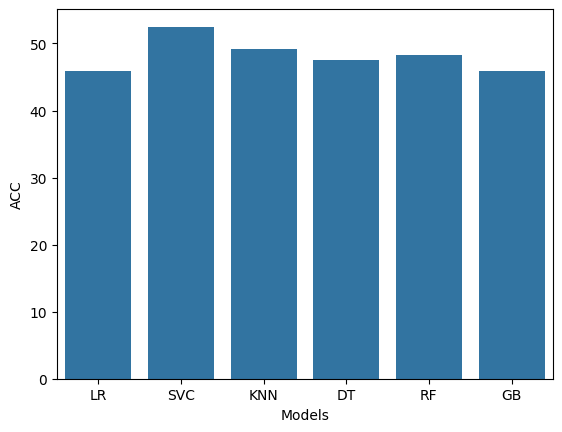

In [79]:
sns.barplot(x='Models', y='ACC', data=final_data)
plt.show()

In [ ]:
# gb = GradientBoostingClassifier()
# gb.fit(X,y)

from sklearn import svm

svm = svm.SVC()
svm.fit(X,y)

SVC()

In [81]:
new_data = pd.DataFrame({
    'cgpa':9.1,
    'project_score':95,
    'internships':1,
    'extracurricular_score':82,
    'total_score':312,
    'department':0,
    'field':0,
},index=[0])

In [82]:
p = gb.predict(new_data)
prob = gb.predict_proba(new_data)[0]
if p==0:
    print('Selected')
    print(f"You will be Selected with probability of {prob[0]:.2f}")
elif p==1:
    print('Rejected')
else:
    print('No offer')

Selected
You will be Selected with probability of 0.80


In [83]:
prob

array([0.8019188 , 0.17277702, 0.02530417])

In [84]:
import joblib

In [85]:
joblib.dump(gb,'model_placement_prediction')

['model_placement_prediction']

In [86]:
model = joblib.load('model_placement_prediction')

In [87]:
model.predict(new_data)

array([0])